In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',500)
loanDf=pd.read_csv('loan.csv')

In [2]:
#Printing some information about the Loan dataframe

print("Shape of the data frame :",loanDf.shape)
print("===================================================")
print("Information about the data frame :",loanDf.info())
print("===================================================")
print("The data types of columns of data frame",loanDf.dtypes)

Shape of the data frame : (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
Information about the data frame : None
The data types of columns of data frame id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [3]:
#Data Cleaning EDA
# Checking for Duplicate rows in the dataset.
print(loanDf.duplicated(subset=None,keep='first').count())

39717


In [4]:
# The column used for checking is id column
duplicate_rows=loanDf[loanDf.duplicated(['id'])]
print("duplicate_rows :", duplicate_rows)

duplicate_rows : Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_

In [5]:
#Hence there are no duplicate rows. This has printed the coloumns tha we have in loan.csv file.

In [6]:
# Finding number of rows through sum function which have missing values

print('Number of rows having all values as null:')
print(loanDf.isnull().all(axis=1).sum())

# Finding the number of columns through sum function which have missing values

print('Number of columns having all values as null:')
print(loanDf.isnull().all(axis=0).sum())

Number of rows having all values as null:
0
Number of columns having all values as null:
54


In [7]:
#As we saw in the output, no. of rows where all the values are null is 0 and no. of columns where all the values 
#are null is 54.

In [8]:
# Finding out columns which have all null values

loanDf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Dropping the columns where all values are null.The dataset has null values in 53 to 105 index of columns

loanDf.drop(loanDf.iloc[:,53:105],inplace=True,axis=1)

In [10]:
# Now, as a next step dropping other columns which are not required in the analysis 
# as they contain most of the values as nulls

col_drop_l1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loanDf.drop(labels=col_drop_l1,axis=1,inplace=True)

col_drop_l2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loanDf.drop(labels=col_drop_l2,axis=1,inplace=True)

col_drop_l3=["member_id","url","emp_title","zip_code","tax_liens"]
loanDf.drop(labels=col_drop_l3,axis=1,inplace=True)

#Checking now the updated shape of the dataframe
print("Shape of the data frame :",loanDf.shape)

Shape of the data frame : (39717, 45)


In [11]:
#So we have now 45 coloumns

In [12]:
# Data Clean on pub_rec_bankruptcies column as it will be used in analysis
print('Before cleaning pub_rec_bankruptcies')
print(loanDf.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'Not Known' with NA values
loanDf.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('After cleaning pub_rec_bankruptcies')
print(loanDf.pub_rec_bankruptcies.isnull().sum())

Before cleaning pub_rec_bankruptcies
697
After cleaning pub_rec_bankruptcies
0


In [13]:
#Data Manipulation and Cleaning step for removing % symbol from interest rate column to be used in analysis further
loanDf['int_rate']=loanDf['int_rate'].str.rstrip('%')

#Data Manipulation and Cleaning step for removing % symbol from revol_util column to be used in analysis further
loanDf['revol_util']=loanDf['revol_util'].str.rstrip('%')

In [14]:
# Extracting digits from Employee's length column i.e. Employee's Tenure.This variable will add value in our analysis

# Firstly filling null values with 0
loanDf.emp_length.fillna('0',inplace=True)
loanDf['emp_length']=loanDf.emp_length.str.extract('(\d+)')

In [15]:
loanDf.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [16]:
# Converting amount columns to numeric data
columns1=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loanDf[columns1]=loanDf[columns1].apply(pd.to_numeric)

In [17]:
# Dropping the current customers as they are not required for driving factors consideration.
loanDf = loanDf[loanDf.loan_status != "Current"]

In [18]:
# Current status of the loan dataset now after some cleaning and manipulations

print("Shape of the data frame :",loanDf.shape)
print("===================================================")
print("Information about the data frame :",loanDf.info())
print("===================================================")
print("The data types of columns of data frame",loanDf.dtypes)

Shape of the data frame : (38577, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  float64
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object

In [19]:
# Let us now remove the columns which are not required
# First lets analyse the object data types
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.

loanDf.drop(['pymnt_plan','title', 'addr_state', 'initial_list_status','application_type'],axis=1,inplace=True)

# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

loanDf.drop(['collection_recovery_fee',
         'collections_12_mths_ex_med','policy_code'],axis=1,inplace=True)

# Current status of the loan dataset now after some cleaning and manipulations

print("Shape of the data frame :",loanDf.shape)

Shape of the data frame : (38577, 37)


In [20]:
# Delete rows containing either 50% or more than 50% NaN Values
perc = 50.0 # Here N is 50
min_count =  int(((100-perc)/100)*loanDf.shape[1] + 1)
print("rows containing either 50% or more than 50% NaN Values :", min_count)

rows containing either 50% or more than 50% NaN Values : 19


In [21]:
modRowdDf = loanDf.dropna( axis=0, thresh=min_count)
modRowdDf

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,...,2822.969293,1213.88,2500.00,322.97,0.00,0.00,Jul-10,80.90,Jun-10,Not Known
39713,90665,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,...,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,Jul-10,281.94,Jul-10,Not Known
39714,90395,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,...,5272.161128,1397.12,5000.00,272.16,0.00,0.00,Apr-08,0.00,Jun-07,Not Known
39715,90376,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,...,5174.198551,672.66,5000.00,174.20,0.00,0.00,Jan-08,0.00,Jun-07,Not Known


In [22]:
# Finding out percentages of various loan_status out of total loans issued
loanDf = modRowdDf
(loanDf.loan_status.value_counts()*100)/len(loanDf)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [23]:
#Finding out percentages of various purpose of loans out of total loans issued

(loanDf.purpose.value_counts()*100)/len(loanDf)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [24]:
# Usefull insights obtained from here are :-
# Top4 purposes for taking loans are Debt_consolidation, Credit Card payment, home improvements and other personal reasons.
# Below 4 purposes for taking loans are vacation, house, education and renewable energy.


In [25]:
# Outlier Identification and Removal
# Box Plot helps in removing Outliers


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings,scipy
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.special import boxcox1p, boxcox
import scipy.stats as stats 
import statsmodels.api as sm
pd.set_option('display.max_rows', None, 'display.max_columns', None)

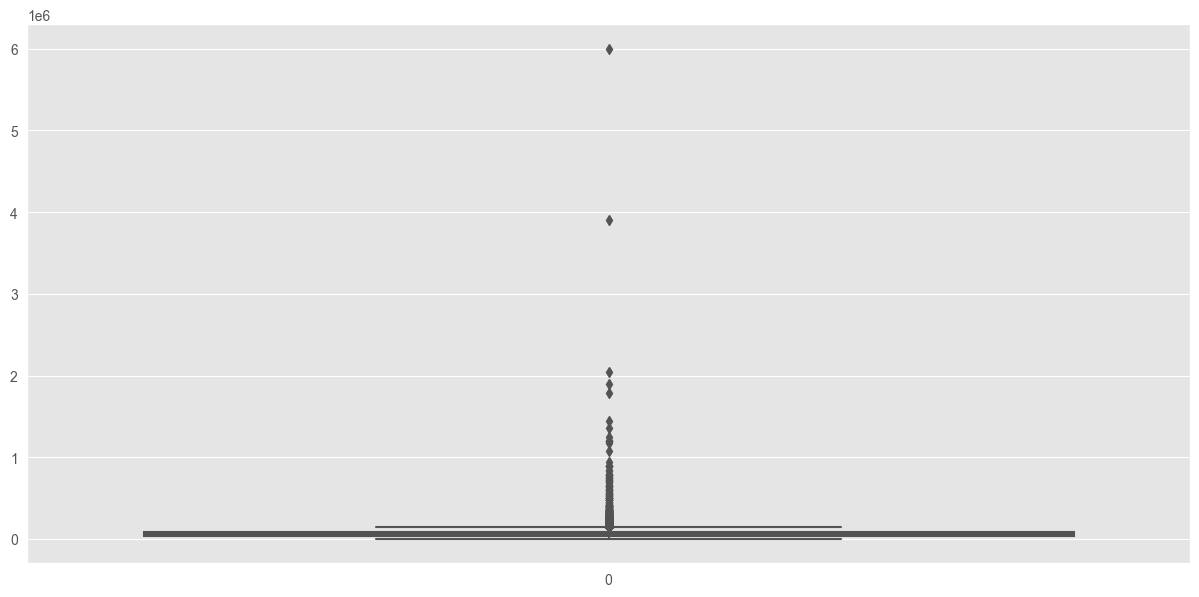

In [29]:
# Annual Income

# Drawing Boxplot for Annual Income
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loanDf.annual_inc)

In [30]:
quant_info = loanDf.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [31]:
# Observations -
# There are outliers, so we need to remove it
# So, we are taking a threshold of 95 percentile

In [32]:
# Basic Statistics with Quantitative Variables

print('Before removing Outliers from Annual Income :\n')
print(loanDf['annual_inc'].describe(),'\n')

# Removing Outliers i.e. Quantile 0.95 from Annual Income attribute

loan_df=loanDf[loanDf["annual_inc"]< loanDf["annual_inc"].quantile(0.95)]

print('After removing outliers from annual Income:\n')
print(loanDf["annual_inc"].describe())

Before removing Outliers from Annual Income :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

After removing outliers from annual Income:

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [33]:
quant_info = loanDf["annual_inc"].quantile([0.5, 0.75,0.90, 0.95, 0.99])
quant_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

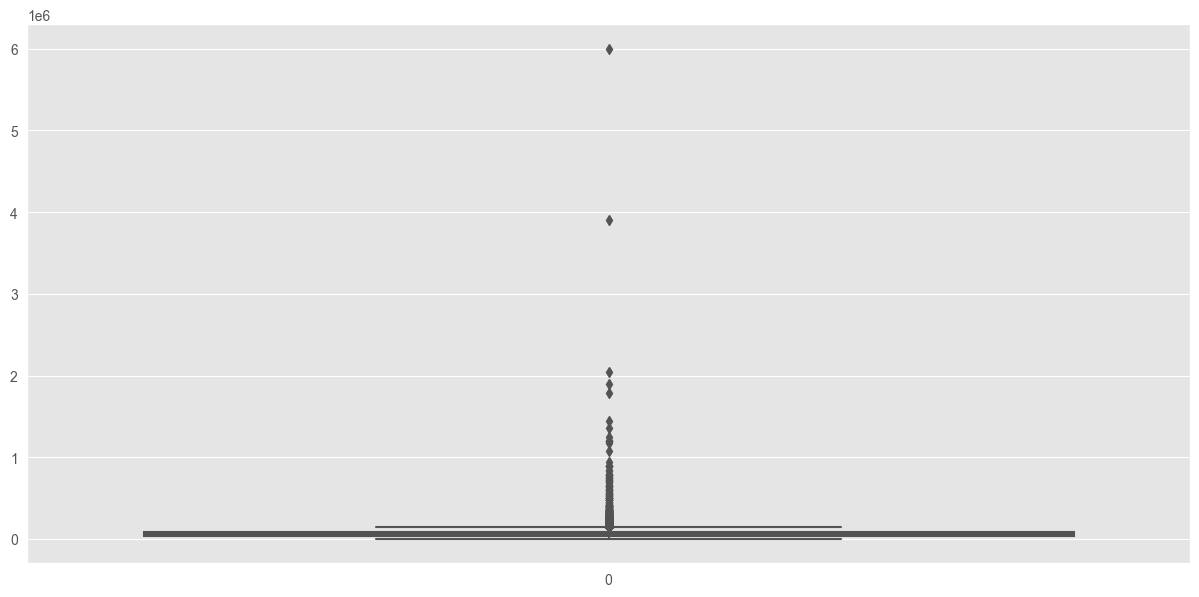

In [34]:
# Drawing Boxplot for Annual Income
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loanDf.annual_inc)

In [35]:
#Getting quantitative variables with describe for loan amount
loanDf['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [36]:
quant_info = loanDf["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

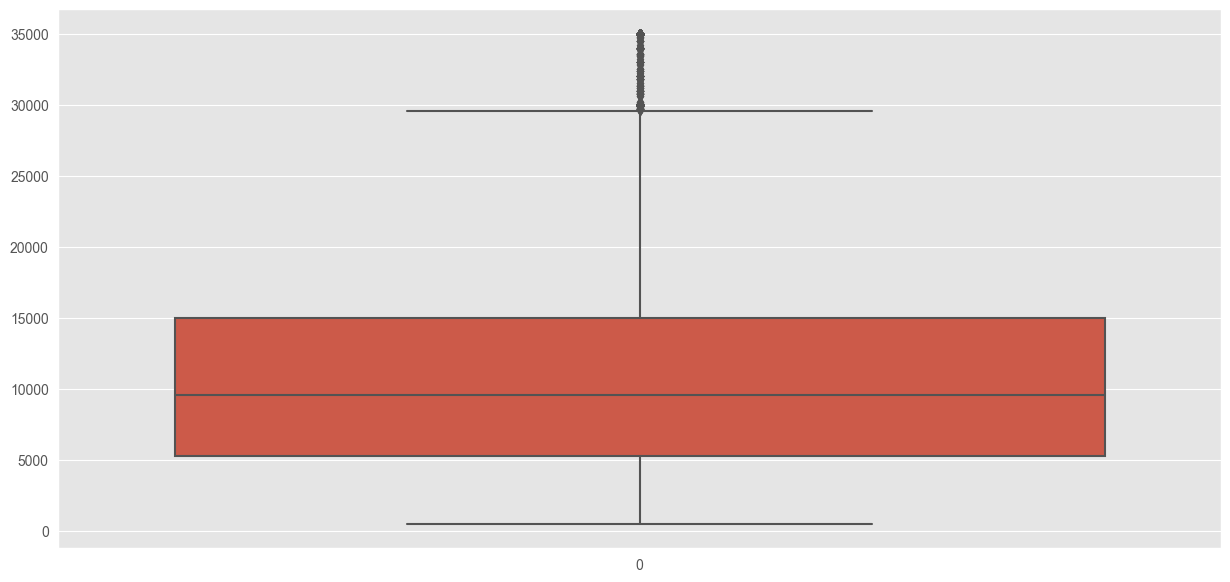

In [37]:
#Drawing Box Plot for loan amount
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loanDf.loan_amnt)

In [38]:
# Observations - Most of the vales are concentrated from 5000 to 15000. There are some values far from the distribution, but as the distribution is mostly continuous.

# So, there is no need to remove outliers / extreme values for these above columns.

In [39]:
#Getting quantitative variables with describe for total payment
loanDf["total_pymnt"].describe()

count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64

In [40]:
quant_info = loanDf["total_pymnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50     9674.048405
0.75    16136.952430
0.90    24144.089150
0.95    29620.756460
0.97    32894.468009
0.98    36230.075738
0.99    41308.443919
Name: total_pymnt, dtype: float64

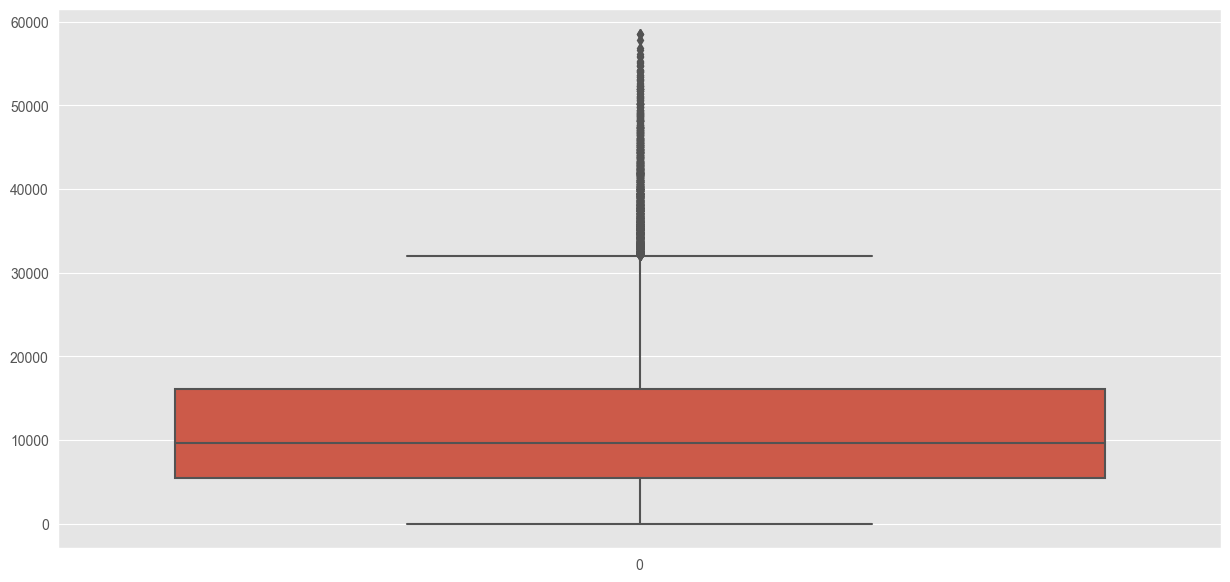

In [41]:
# Drawing Boxplot for Total Payment
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loanDf.total_pymnt)

In [42]:
#  ###### Observations -

# Mostly the values are concentrated from ~7000 to ~18000.

# There are some values far from the distribution, but as the distribution is mostly continuous.

# So, there is no need to remove outliers / extreme values for these above columns.

In [43]:
# Interest Rate
#Basic Statistics with Interest Rate

loanDf['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [44]:
quant_info = loanDf["int_rate"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quant_info

0.50    11.710
0.75    14.380
0.90    16.820
0.95    18.312
0.97    19.290
0.98    19.910
0.99    20.990
Name: int_rate, dtype: float64

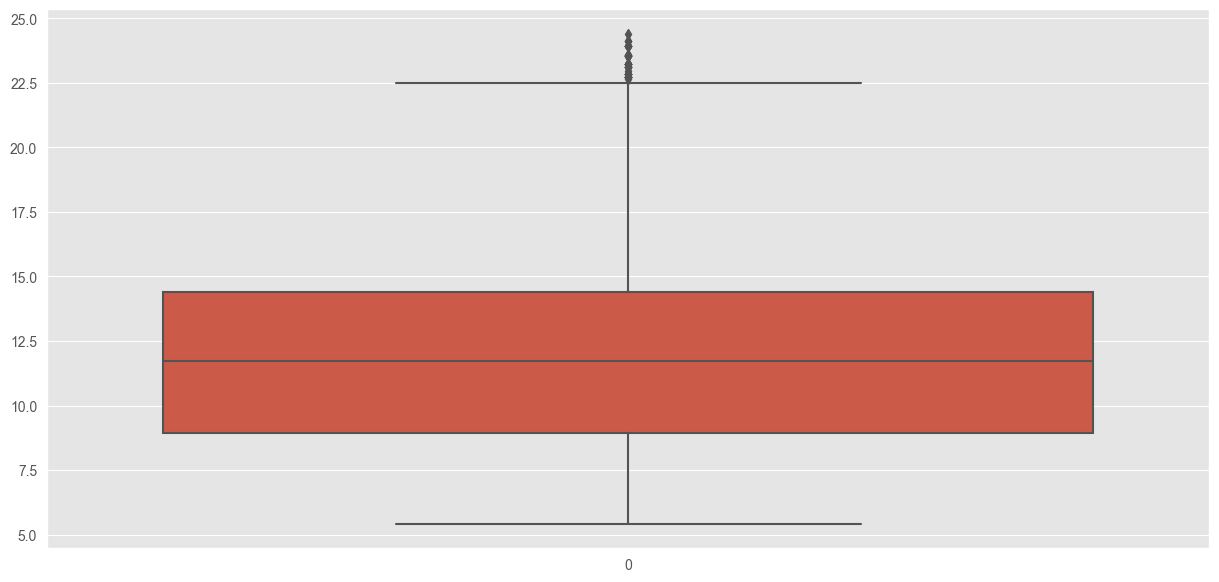

In [45]:
# Drawing Boxplot for Interest Rate
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loanDf.int_rate)

In [46]:
# Observations - There are some values far from the distribution, but as the distribution is mostly continuous.

# Mostly the values are concentrated between ~9 tp ~14

# So, there is no need to remove outliers / extreme values for these above columns.

In [48]:
# Creating buckets for further analysis

#Creating Bins for further analysis
#Creating categories for loan amounts for further bivariate analysis
loanDf['loan_amnt_categories']=pd.cut(loanDf['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further bivariate analysis
loanDf['annual_inc_categories']=pd.cut(loanDf['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loanDf['interest_rate_categories']=pd.cut(loanDf['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loanDf['dti_categories']=pd.cut(loanDf['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loanDf.shape)

loanDf.head(5)

(38577, 41)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0.0,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0.0,0-7000,0-20000,12.5-16,5-10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0,7000-14000,40000-60000,12.5-16,15-20
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0-7000,20000-40000,0-10,10-15


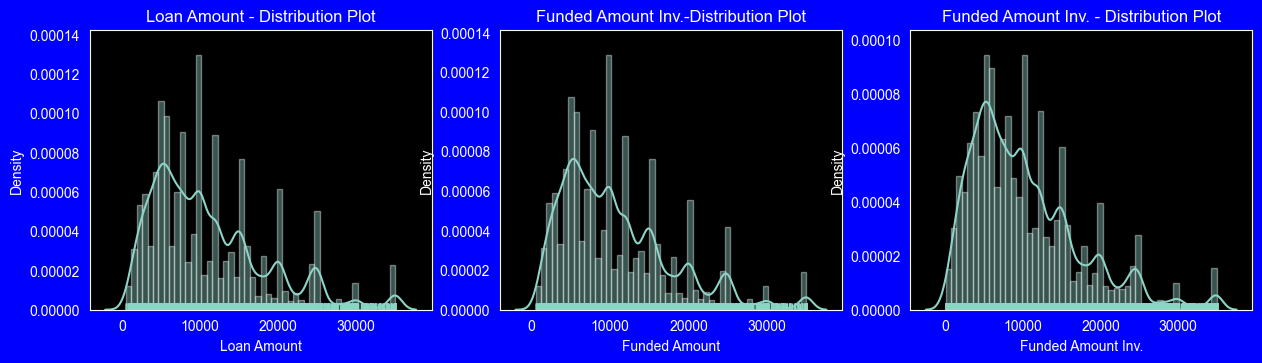

In [53]:
#Distribution ofLoan Amounts using distribution plots

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
with plt.style.context('dark_background'):

  #subplot1
  plt.subplot(2,3,1)
  ax=sns.distplot(loanDf['loan_amnt'],rug=True)
  ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


  #subplot2
  plt.subplot(2,3,2)
  ax=sns.distplot(loanDf['funded_amnt'],rug=True)
  ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')


  #subplot3

  plt.subplot(2, 3, 3)
  ax = sns.distplot(loanDf['funded_amnt_inv'],rug = True)
  ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

  plt.show()

In [54]:
# Observation - Distribution of amounts for all three looks very much similar.

In [55]:
# Analyzing by issued month and year
# Univariate Analysis for Loan Amount Variable
# Extracting month and year
df_month_year = loanDf['issue_d'].str.partition("-", True)     
loanDf['issue_month']=df_month_year[0]                       
loanDf['issue_year']='20' + df_month_year[2]

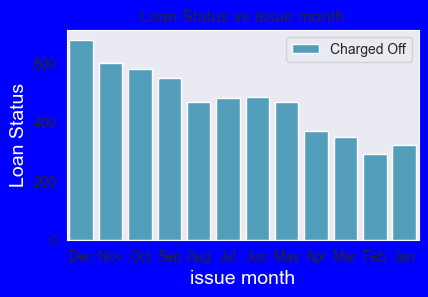

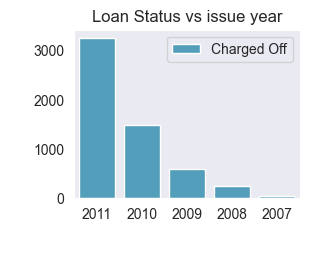

In [56]:
plt.figure(figsize=(10,6),facecolor='b')

plt.subplot(221)
ax = sns.countplot(x='issue_month', data=loanDf[loanDf['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue month')
ax.set_xlabel('issue month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.subplot(222)
ax = sns.countplot(x='issue_year', data=loanDf[loanDf['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue year')
ax.set_xlabel('issue year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [57]:
# Observations:-
# Maximum Loans were charged off during the months from Sept to Dec with maximum in Dec.
# Least number of loans were charged off during the months of Feb-Apr.
# In the year 2011 maximum loans were Charged off.
# Minimum loans were charged off in the year 2007.



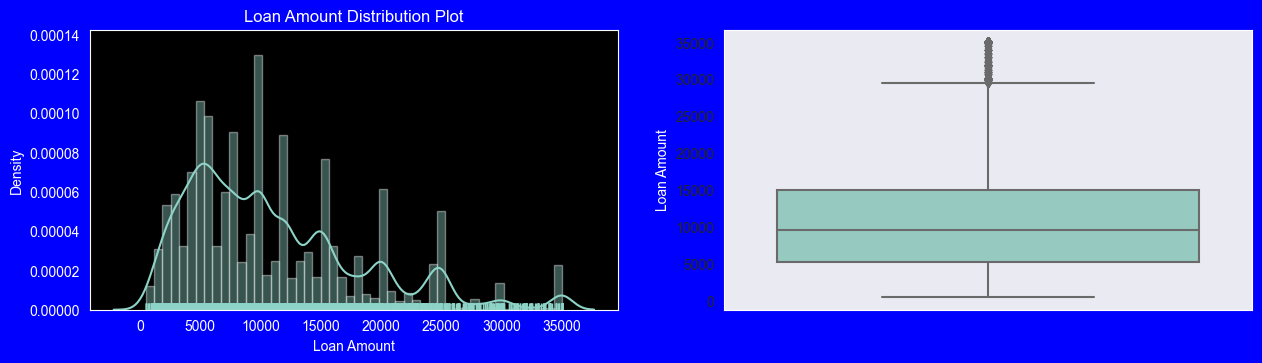

In [58]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='b')
  
  #Subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loanDf['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', fontsize=10,color='w')

  #Subplot 2
  sns.set_style("dark")

  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loanDf['loan_amnt'])
  ax.set_ylabel('Loan Amount', fontsize=10,color='w')
  plt.show()

In [59]:
# Observations -
# Most of the loan amounts are in the range 5000-15000
# High density of loan amounts are taken for rounded amounts like 5000, 10000, 15000, 20000, 25000, 30000, 35000. Major spikes
# are seen at these values.


Text(0, 0.5, 'Interest Rate')

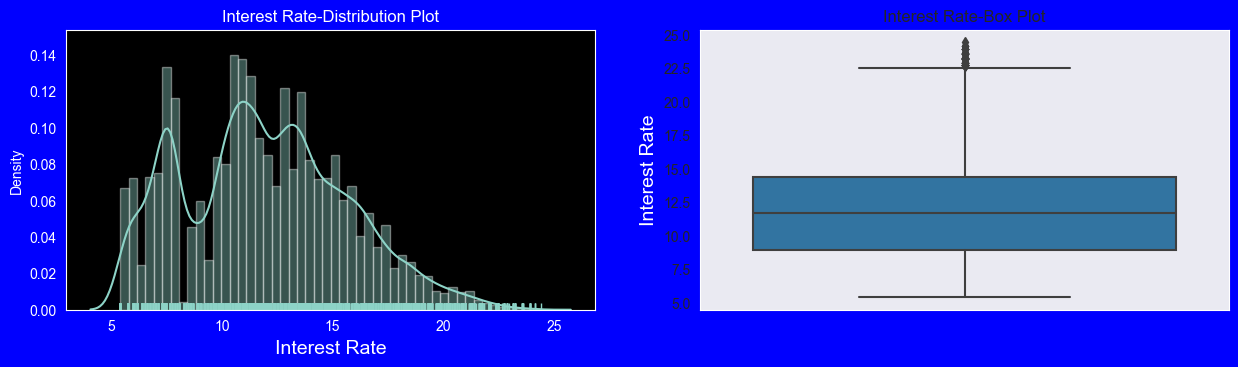

In [60]:
# Univariate Analysis of Interest Rate Variable

plt.figure(figsize=(15,8),facecolor='b')

with plt.style.context('dark_background'):
  #subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loanDf['int_rate'],rug=True)
  ax.set(title='Interest Rate-Distribution Plot')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')

#subplot 2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loanDf['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')

In [61]:
# Observations:-

# The interest rates for most of the density is from 10% to 15%.
# Most of the people are having a income in such a way that the interest rates are calculated from 10-15 range.
# Very less people are having high income so the intrest rates are not high for 20-25 range.
# Also the loan amount seems to be same for a high number of people such that the interest rates are seen from 10-15.
# Very less people are asking for high loan amount.

Text(0, 0.5, 'Annual Income')

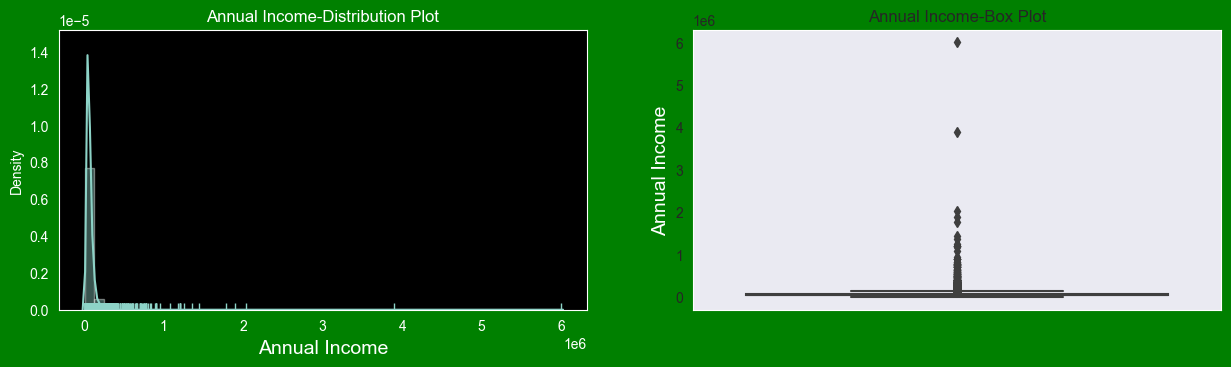

In [62]:
# Univariate Analysis of Annual Income

plt.figure(figsize=(15,8),facecolor='g')

with plt.style.context('dark_background'):
  #Subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loanDf['annual_inc'],rug=True)
  ax.set(title='Annual Income-Distribution Plot')
  ax.set_xlabel('Annual Income',fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loanDf['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14,color='w')

In [63]:
#Observations - Some of the invalid values like 1.00E + 05 are not removed from the annual income column hence the graph is coming incorrecr.
# Need to remove values like 1.00E + 05.


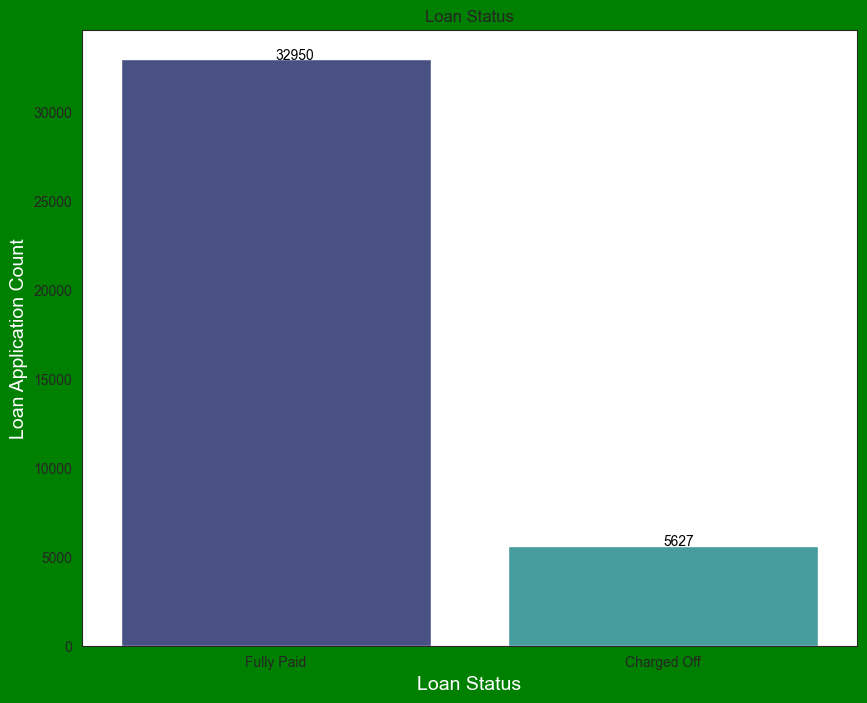

In [64]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("white")
ax=sns.countplot(x="loan_status",data=loanDf,palette='mako')
ax.set(title='Loan Status')
ax.set_xlabel('Loan Status',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')

s=loanDf['loan_status'].value_counts()
for i,v in s.reset_index().iterrows():
  ax.text(i,v.loan_status+0.3,v.loan_status,color='k')

In [65]:
# Observations -
# 32950 Loans are fully paid off and 5627 loans are charged off loans.
# The following plot shows that around 14% loans were charged off out of the total loans issued

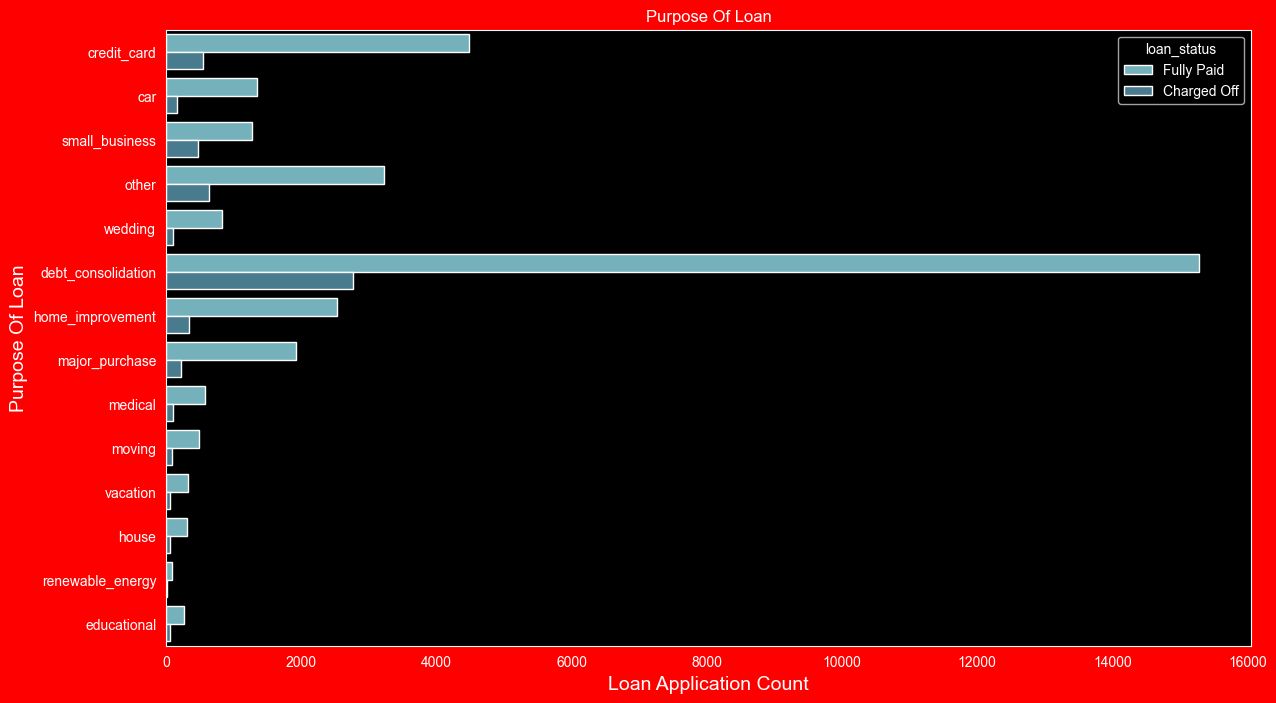

In [66]:
# Univariate Analysis - Unordered Categorical Variables - Purpose of Loan

plt.figure(figsize=(14,8),facecolor='r')
sns.set_style("dark")
with plt.style.context('dark_background'):
  ax=sns.countplot(y="purpose",data=loanDf,hue='loan_status',palette='GnBu_d')
  ax.set(title='Purpose Of Loan')
  ax.set_ylabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_xlabel('Loan Application Count',fontsize=14,color='w')
  plt.show()

In [67]:
# Observations -
# The Count Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of charged off count also high too for these loans.

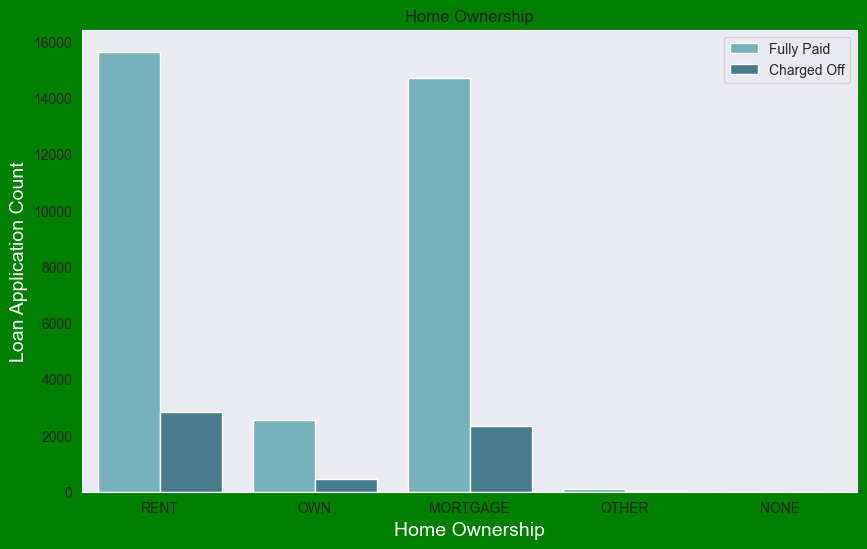

In [68]:
#  Univariate Analysis - Unordered Categorical Variable - Home Ownership

plt.figure(figsize=(10,6),facecolor='g')
ax=sns.countplot(x="home_ownership",data=loanDf,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()

In [69]:
# Observations:-
# Most of the loan applicants are staying in Rented homes followed by Mortgage homes.
# Very less Loan applicants own a home.

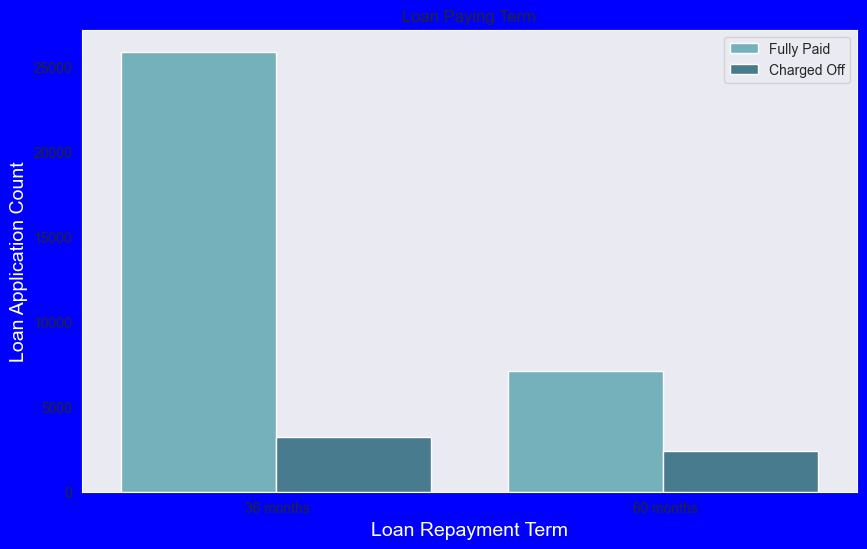

In [70]:
# Univariate analysis- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax=sns.countplot(x="term",data=loanDf,hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [71]:
# Observations:-

#Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting
#charged off as compared to applicants who had taken loan for 36 months.

In [72]:
# Bivariate Analysis

loanDf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'loan_amnt_categories', 'annual_inc_categories',
       'interest_rate_categories', 'dti_categories', 'issue_month',
       'issue_year'],
      dtype='object')

In [75]:
# Correlation Analysis-Bivariate Matrix
loan_correlation=loanDf.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
id,1.000000,0.120614,0.131283,0.231603,0.053936,0.076088,0.089470,0.005572,0.091785,-0.008417,-0.041021,0.016256,-0.017683,0.001357,0.039902,NaN,NaN,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,0.142251
loan_amnt,0.120614,1.000000,0.981790,0.937922,0.301265,0.932260,0.156259,0.268999,0.062436,-0.031951,0.012940,0.177200,-0.049997,0.314022,0.256179,NaN,NaN,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.474614
funded_amnt,0.131283,0.981790,1.000000,0.956172,0.304930,0.958035,0.155893,0.264798,0.062194,-0.031866,0.012857,0.175682,-0.050576,0.306501,0.250551,NaN,NaN,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.478448
funded_amnt_inv,0.231603,0.937922,0.956172,1.000000,0.297473,0.905464,0.164291,0.251981,0.070663,-0.038171,-0.002800,0.162738,-0.051470,0.286265,0.242715,NaN,NaN,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.469166
int_rate,0.053936,0.301265,0.304930,0.297473,1.000000,0.277203,0.011440,0.048899,0.110913,0.158479,0.133362,0.006022,0.098635,0.094179,-0.046539,NaN,NaN,0.290661,0.284932,0.174717,0.521233,0.094319,0.128596,0.174377
installment,0.076088,0.932260,0.958035,0.905464,0.277203,1.000000,0.131151,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,0.309501,0.229860,NaN,NaN,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.413588
emp_length,0.089470,0.156259,0.155893,0.164291,0.011440,0.131151,1.000000,0.121229,0.048964,0.016091,0.010937,0.099879,0.050631,0.152821,0.203638,NaN,NaN,0.140425,0.148592,0.132312,0.121895,-0.013655,0.026520,0.087809
annual_inc,0.005572,0.268999,0.264798,0.251981,0.048899,0.267842,0.121229,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,0.277374,0.234534,NaN,NaN,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.143242
dti,0.091785,0.062436,0.062194,0.070663,0.110913,0.052038,0.048964,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,0.228090,0.229119,NaN,NaN,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.008566
delinq_2yrs,-0.008417,-0.031951,-0.031866,-0.038171,0.158479,-0.019755,0.016091,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,-0.054437,0.066994,NaN,NaN,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,-0.012511


In [76]:
# Observations -

# Annual Income to Debt To Income Ratio i.e. dti are negatively correlated

# Loan Amount,Investor Amount and Funding Amount are strongly correlated

# Positive correlation between Annual Income and employment years

# Positive correlation between annual income and funded amount that means people with high income gets high funded amount

# Positive correlation between annual income and total payment

In [81]:
loan_correlation.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)


In [83]:
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
id,1.000000,0.120614,0.131283,0.231603,0.053936,0.076088,0.089470,0.005572,0.091785,-0.008417,-0.041021,0.016256,-0.017683,0.001357,0.039902,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,0.142251
loan_amnt,0.120614,1.000000,0.981790,0.937922,0.301265,0.932260,0.156259,0.268999,0.062436,-0.031951,0.012940,0.177200,-0.049997,0.314022,0.256179,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.474614
funded_amnt,0.131283,0.981790,1.000000,0.956172,0.304930,0.958035,0.155893,0.264798,0.062194,-0.031866,0.012857,0.175682,-0.050576,0.306501,0.250551,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.478448
funded_amnt_inv,0.231603,0.937922,0.956172,1.000000,0.297473,0.905464,0.164291,0.251981,0.070663,-0.038171,-0.002800,0.162738,-0.051470,0.286265,0.242715,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.469166
int_rate,0.053936,0.301265,0.304930,0.297473,1.000000,0.277203,0.011440,0.048899,0.110913,0.158479,0.133362,0.006022,0.098635,0.094179,-0.046539,0.290661,0.284932,0.174717,0.521233,0.094319,0.128596,0.174377
installment,0.076088,0.932260,0.958035,0.905464,0.277203,1.000000,0.131151,0.267842,0.052038,-0.019755,0.011014,0.172893,-0.045706,0.309501,0.229860,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.413588
emp_length,0.089470,0.156259,0.155893,0.164291,0.011440,0.131151,1.000000,0.121229,0.048964,0.016091,0.010937,0.099879,0.050631,0.152821,0.203638,0.140425,0.148592,0.132312,0.121895,-0.013655,0.026520,0.087809
annual_inc,0.005572,0.268999,0.264798,0.251981,0.048899,0.267842,0.121229,1.000000,-0.121530,0.022229,0.035465,0.156927,-0.017864,0.277374,0.234534,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.143242
dti,0.091785,0.062436,0.062194,0.070663,0.110913,0.052038,0.048964,-0.121530,1.000000,-0.033347,0.002178,0.287849,-0.004742,0.228090,0.229119,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.008566
delinq_2yrs,-0.008417,-0.031951,-0.031866,-0.038171,0.158479,-0.019755,0.016091,0.022229,-0.033347,1.000000,0.008733,0.011649,0.007623,-0.054437,0.066994,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,-0.012511


In [84]:
# Bivariate Analysis-Part 1
# In this  section we will analyze the loan status against some important columns which might have an impact on charged off loans.


In [86]:
#  Bivariate Analysis on annual income on Charged Off Loans

inc_range_vs_loan = loanDf.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000+,1122,8859,9981,0.112414


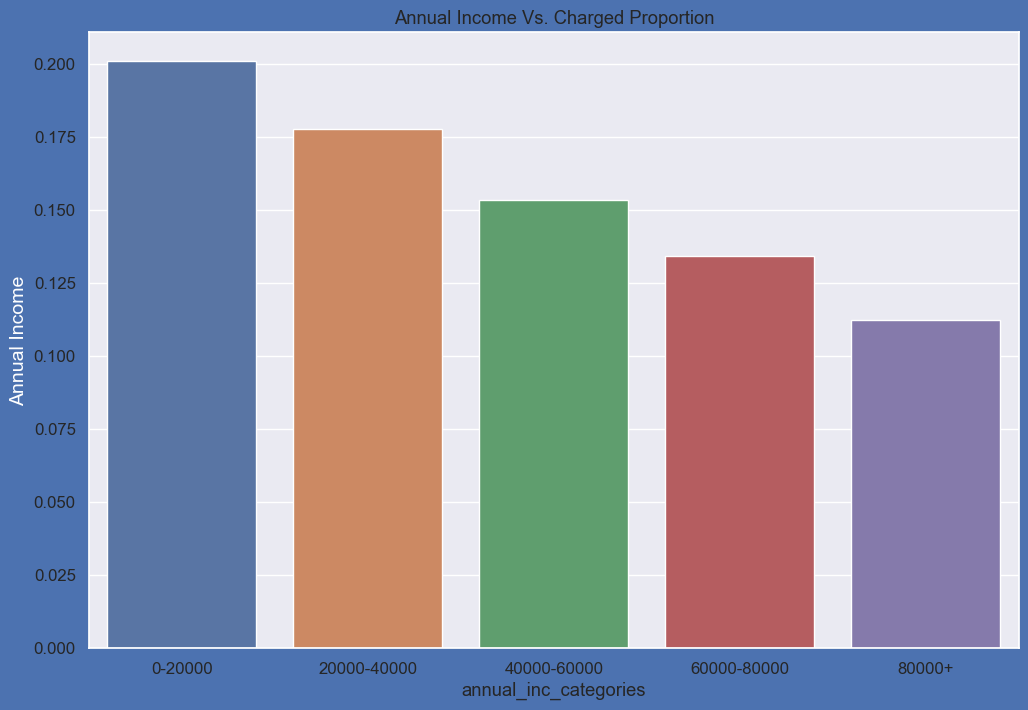

In [87]:
#Drawing Barplots on above calculated data
fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax.set_xlabel('Charged Off Proportion',fontsize=14,color='w')
ax1.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

In [88]:
# Observations
#Income range 80000+ has less chances of charged off.
#Income range 0-20000 has high chances of charged off.
#Notice that with increase in annual income charged off proportion got decreased. So, they are inversely proportional.

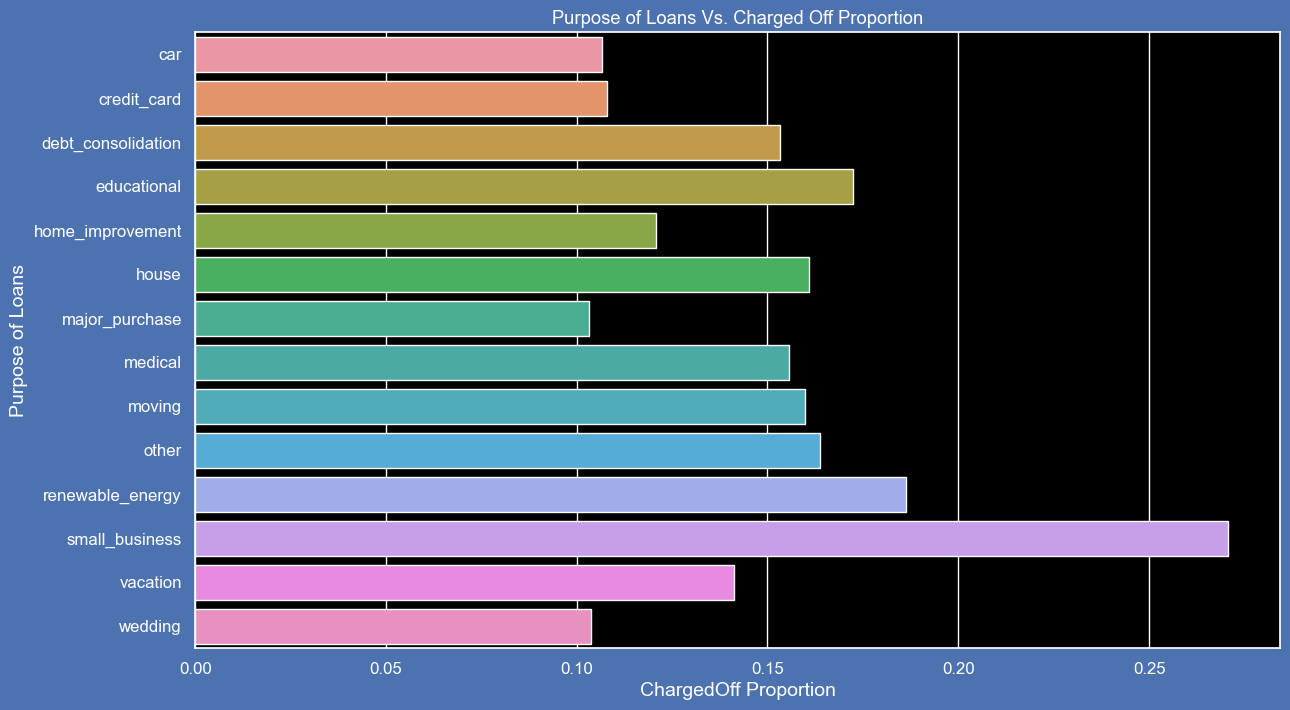

In [89]:
# Bivariate Analysis for purpose of Loan Vs Charged Off Proportion

purpose_vs_loan = loanDf.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

#Drawing Bar Charts from above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

In [90]:
# Observations:-

# Top 4 puposes where th loan is charged off is Small business, education, renewable energy and house and debt consolidation.
# Car, credit card payment and wedding are some of the purposes where the loan is charged off.

In [91]:
# Bivariate analysis of grade against Charged Off Proportion
grade_vs_loan=loanDf.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,101,198,299,0.337793
5,F,319,657,976,0.326844
4,E,715,1948,2663,0.268494
3,D,1118,3967,5085,0.219862
2,C,1347,6487,7834,0.171943
1,B,1425,10250,11675,0.122056
0,A,602,9443,10045,0.059930


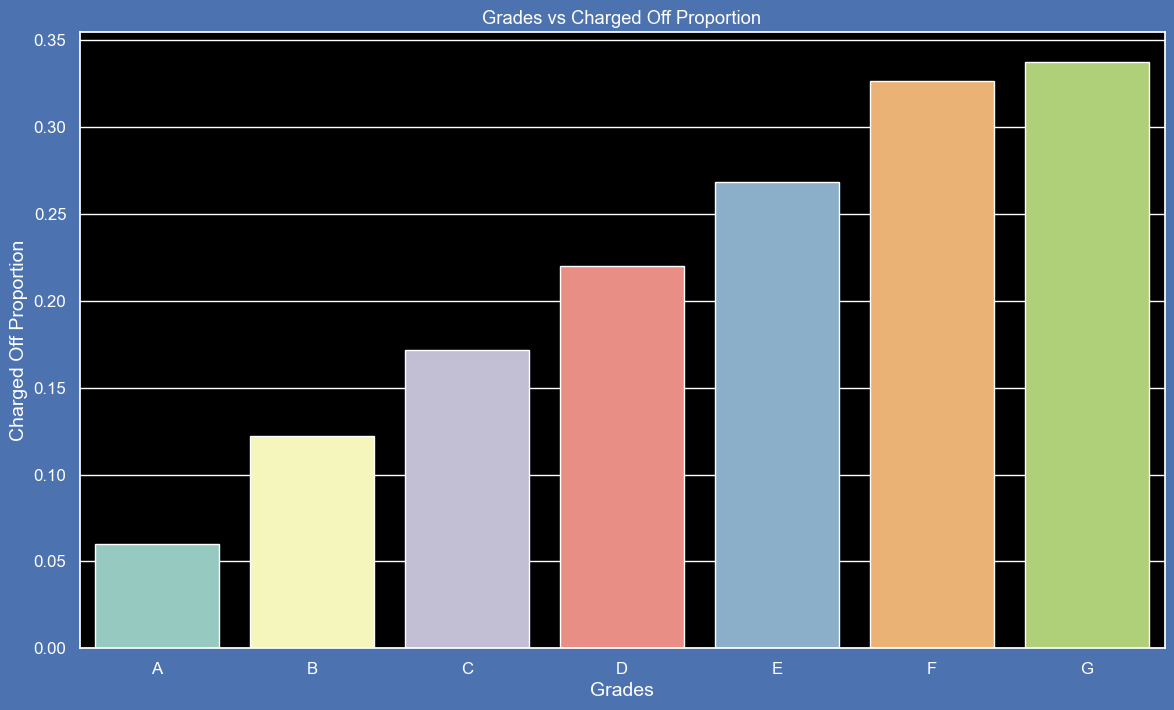

In [92]:
# #Drawing Bar Charts for above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Grades vs Charged Off Proportion')
  ax1=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Grades',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

In [93]:
# Observations:-
# Grade E and F are having high proportion of charged off loans.
# Grade A is having less proportion of charged off loans.
# Chances of getting charged off is increasing with grades moving from A to G

In [94]:
# Bivariate Analysis on sub grade against Charged Off Proportion

grade_vs_loan=loanDf.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
29,F5,54,59,113,0.477876
32,G3,19,26,45,0.422222
31,G2,28,49,77,0.363636
28,F4,53,98,151,0.350993
34,G5,10,19,29,0.344828
30,G1,31,63,94,0.329787
26,F2,70,163,233,0.300429
25,F1,91,214,305,0.298361
23,E4,126,298,424,0.297170
27,F3,51,123,174,0.293103


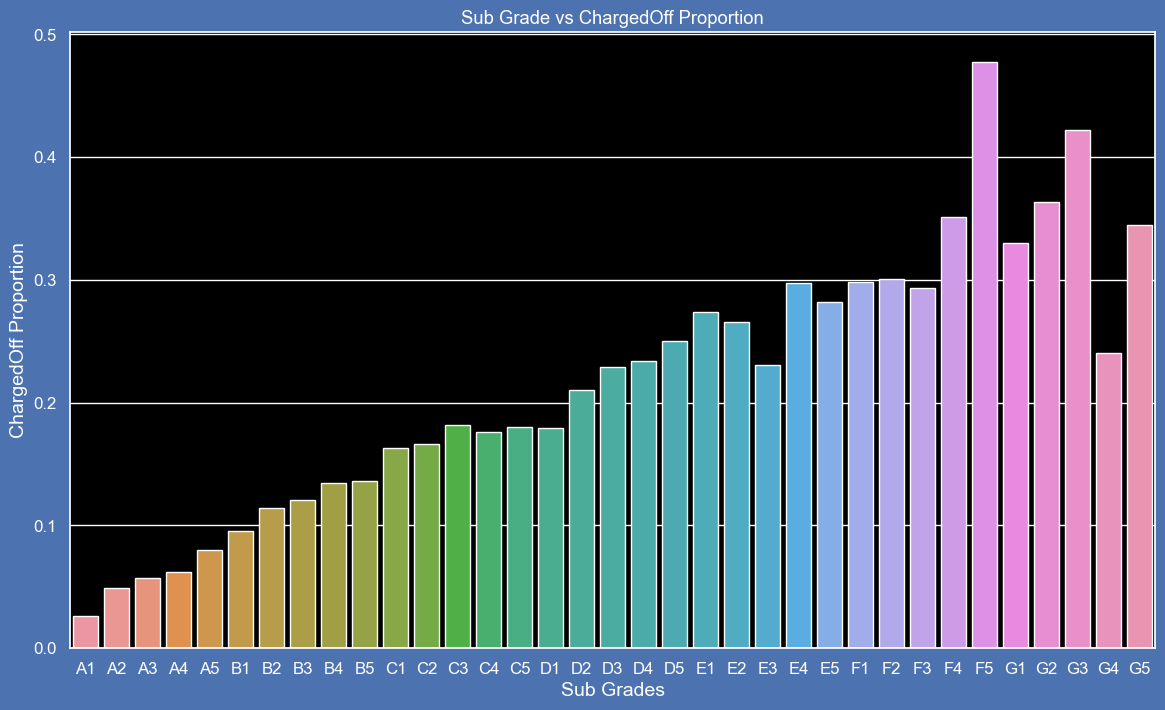

In [95]:
#Drawing Bar Plot from above analysis
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Sub Grade vs ChargedOff Proportion')
  ax1=sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
  ax1.set_ylabel('ChargedOff Proportion',fontsize=14,color='w')

In [96]:
# Observations -
# Sub Grade A1 has least chances of getting charged off
# Sub Grade F and Sub Grade G have high chances of getting charged off
# Chances of getting charged off is increasing with Subgrades moving from A to G

In [97]:
# Bivariate analysis on interest rate against Charged Off

interest_vs_loan = loanDf.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1266,3372,4638,0.272962
2,12.5-16,2003,9470,11473,0.174584
1,10-13,1232,8148,9380,0.131343
0,0-10,830,11486,12316,0.067392


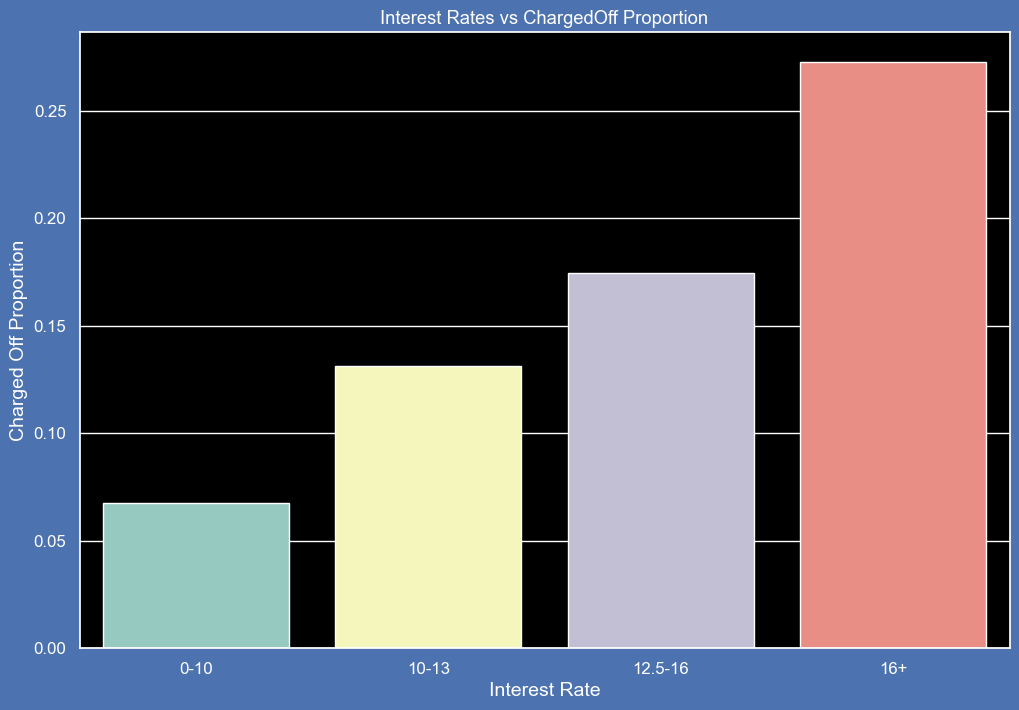

In [98]:
#Drawing bar chart for above analysis

with plt.style.context('dark_background'):
  fig1,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Interest Rates vs ChargedOff Proportion')
  ax1=sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)
  ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

In [99]:
# Observations:

#1.Interest Rates which are less than 10% have very less chances of charged off.
#2.Interest Rates greater than 16 are having high chances of charged off. Less the interest rates, lesser is the chances of 
# loan being chraged off.
#3.Charged Off Proportion increases with higher interest rates

In [100]:
# Bivariate analysis on employment length vs Charged Off Proportion

emplen_vs_loan = loanDf.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,228,805,1033,0.220716
10,10,1331,7157,8488,0.156810
7,7,263,1448,1711,0.153711
5,5,458,2736,3194,0.143394
1,1,1095,6582,7677,0.142634
6,6,307,1861,2168,0.141605
8,8,203,1232,1435,0.141463
3,3,555,3457,4012,0.138335
4,4,462,2880,3342,0.138241
2,2,567,3724,4291,0.132137


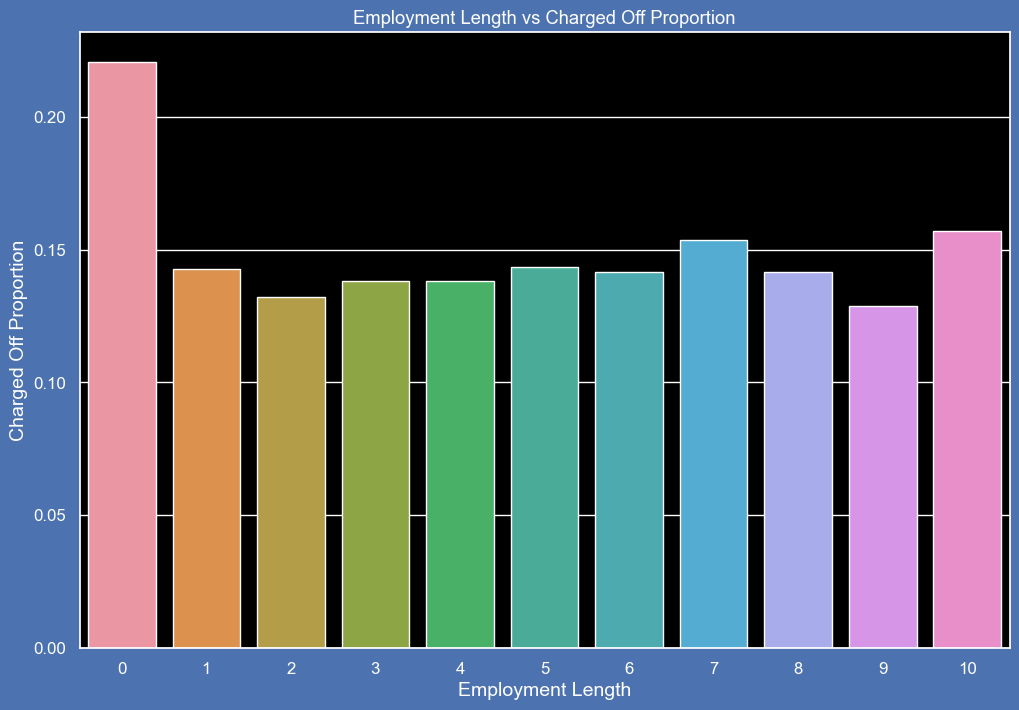

In [101]:
#Draw Bar chart with above variable

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Employment Length vs Charged Off Proportion')
  ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
  ax1.set_xlabel('Employment Length',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

In [102]:
# Observations -
#Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
#It makes sense as with less or no experience they don't have source of income to repay loan.
#Rest of the applicants have more or less same chances of getting charged off.

In [104]:
# Bivariate analysis of verification status against Charged Off Proportion

verify_vs_loan = loanDf.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']
verify_vs_loan['ChargedOff_Proportion'] = verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2142,14552,16694,18836
2,Verified,2051,10155,12206,14257
1,Source Verified,1434,8243,9677,11111


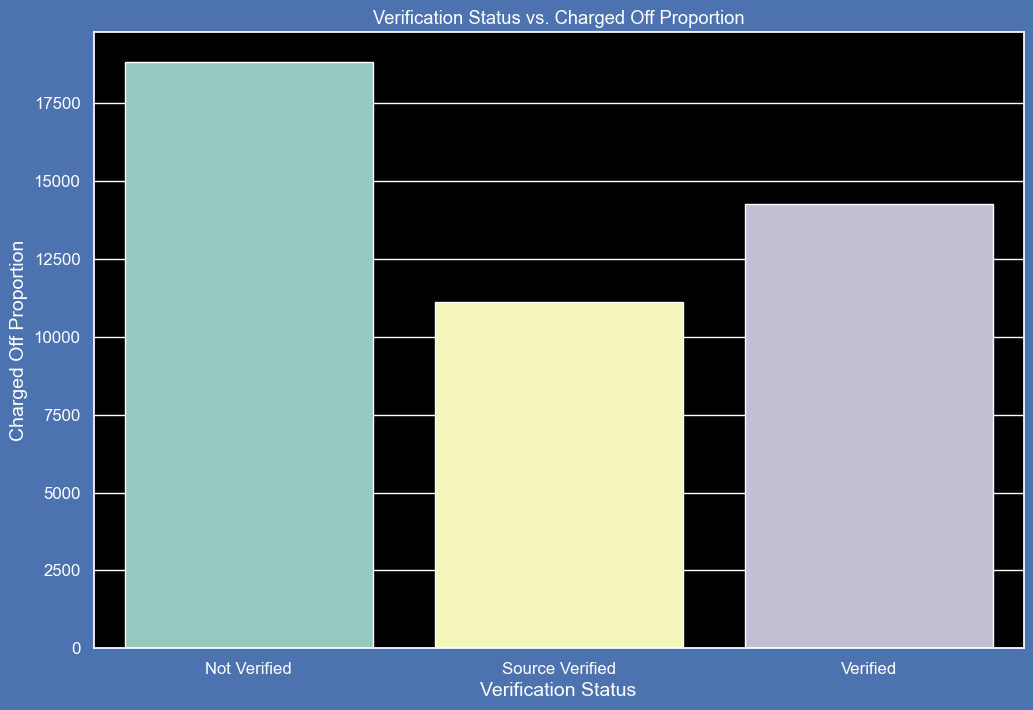

In [105]:
#Drawing Bar Plot for above Cases

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set_title('Verification Status vs. Charged Off Proportion')
  ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_vs_loan)
  ax1.set_xlabel('Verification Status',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

In [106]:
# Observations
#As there is not much difference in Charged off proportions, the variable doesn't provide 
#any insight on Charged Off Proportion

In [107]:
# Bivariate analysis on pub_rec_bankruptcies against ChargedOff Proportion
bankruptcies_vs_loan = loanDf.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,366,1271,1637,0.223580
3,Not Known,118,579,697,0.169297
0,0.0,5141,31097,36238,0.141868


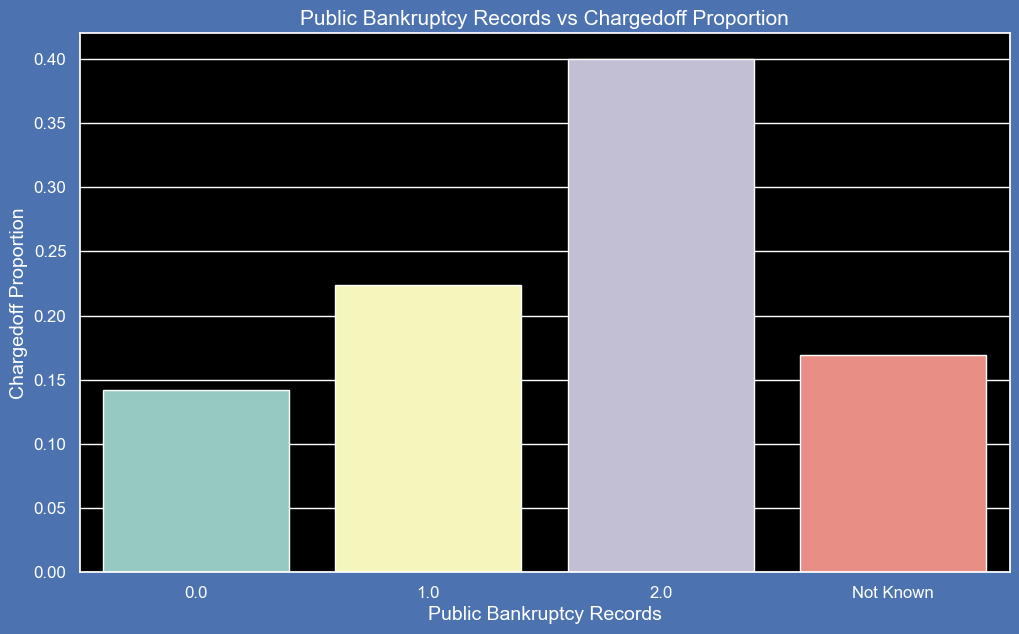

In [108]:
#Drawing Bar Plots for above Variables

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,7),facecolor='b')
  ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
  ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

In [109]:
# Observations:-

#Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
#pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
#Not known is the column for which we don't have any information abount borrower.
#This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [110]:
# Bivariate analysis of Derogatory Public Records vs. Charged Off Proportion

bankruptcies_vs_loan = loanDf.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,457.0,1556.0,2013.0,0.227024
2,2,10.0,38.0,48.0,0.208333
0,0,5160.0,31347.0,36507.0,0.141343
3,3,0.0,7.0,7.0,0.000000
4,4,0.0,2.0,2.0,0.000000


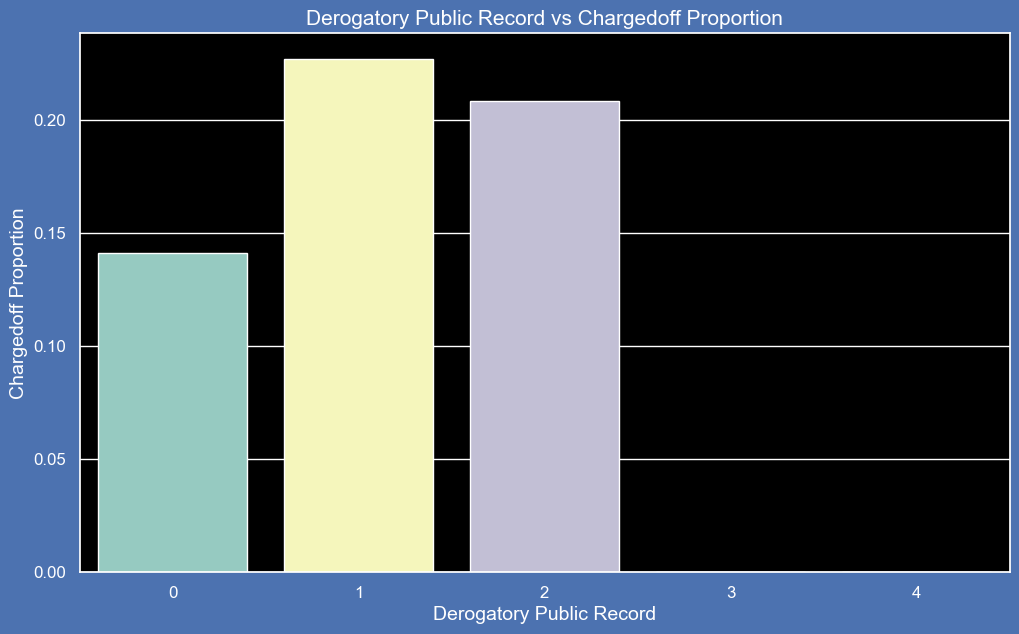

In [111]:
# Lets visualize the pattern to understand the data better.

with plt.style.context('dark_background'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
  ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
  ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
  plt.show()

In [112]:
#  Observations -
#A derogatory item is an entry that may be considered negative by lenders because it indicates risk.Public records and collections are derogatory items
#because they reflect financial obligations that were not paid as agreed.
#Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
#pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

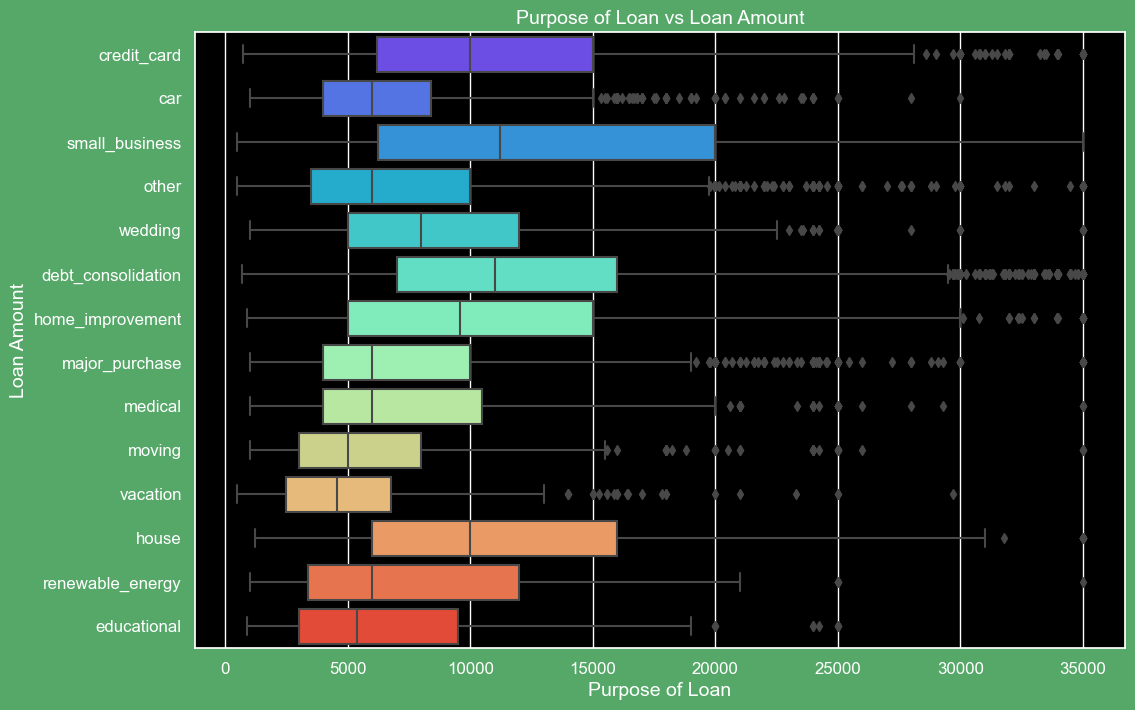

In [113]:
#  Bivariate Analysis-Part 2
# Bivariate Analysis Purpose of Loan Vs Loan amount
with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8),facecolor='g')
  ax=sns.boxplot(y='purpose',x='loan_amnt',data=loanDf,palette='rainbow')
  ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
  ax.set_xlabel('Purpose of Loan',fontsize=14,color='w')
  ax.set_ylabel('Loan Amount',fontsize=14,color='w')
  plt.show()

In [114]:
# Observations -
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

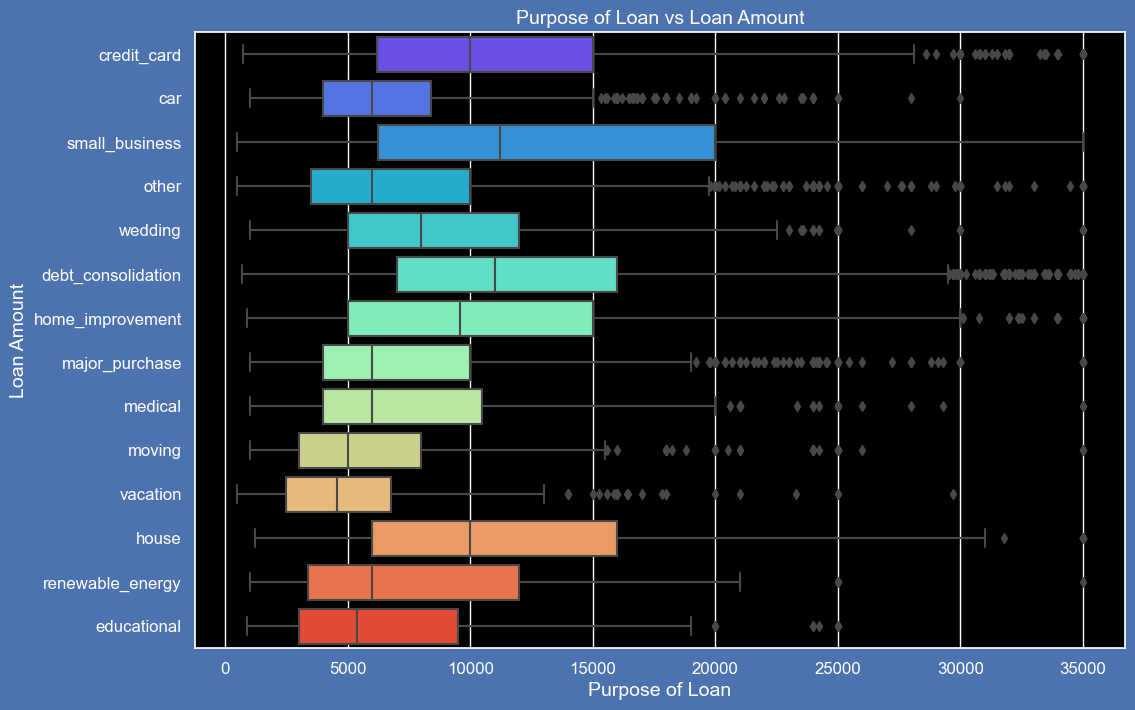

In [116]:
# Bivariate Analysis -Purpose of Loan Vs. Loan amount

with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8),facecolor='b')
  ax=sns.boxplot(y='purpose',x='loan_amnt',data=loanDf,palette='rainbow')
  ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
  ax.set_xlabel('Purpose of Loan',fontsize=14,color='w')
  ax.set_ylabel('Loan Amount',fontsize=14,color='w')
  plt.show()

In [117]:
# Observations-
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributedas compare to loan taken for other purposes.

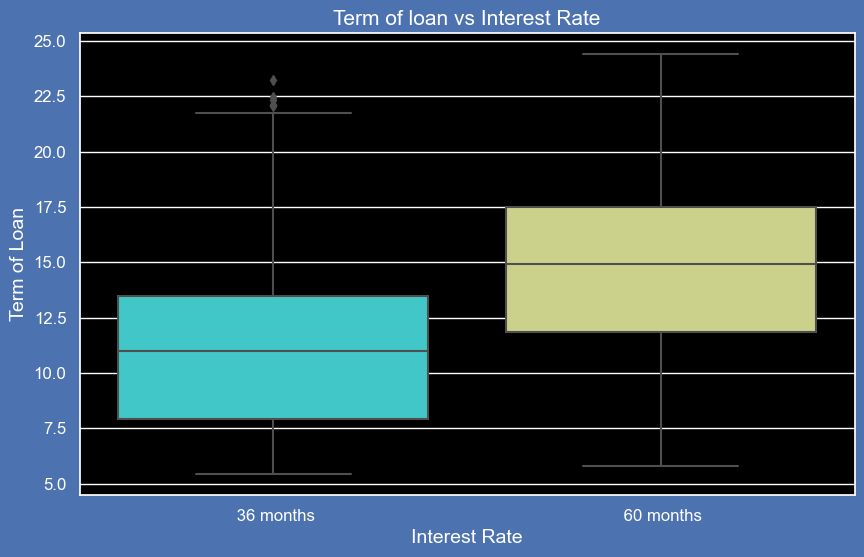

In [118]:
# Bivariate Analysis-Term of Loan vs. Interest Rate Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(10,6),facecolor='b')
  ax=sns.boxplot(y='int_rate',x='term',data=loanDf,palette='rainbow')
  ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax.set_ylabel('Term of Loan',fontsize=14,color='w')
  plt.show()

In [119]:
# Observations -
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

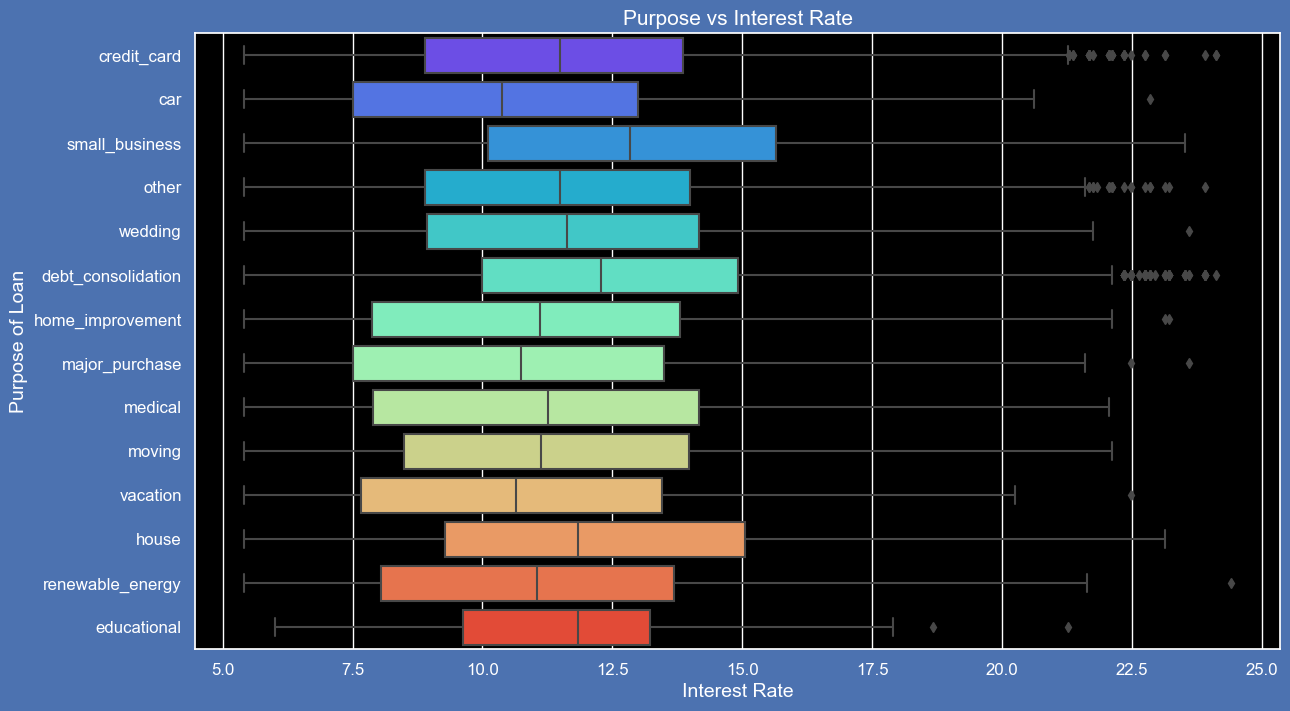

In [120]:
# Bivariate Analysis - Purpose vs Interest Rate

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(x='int_rate', y='purpose', data =loanDf,palette='rainbow')
  ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
  plt.show()

In [121]:
# Observations -
# It is clear that avearge intrest rate is highest for small business purpose.
#Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.


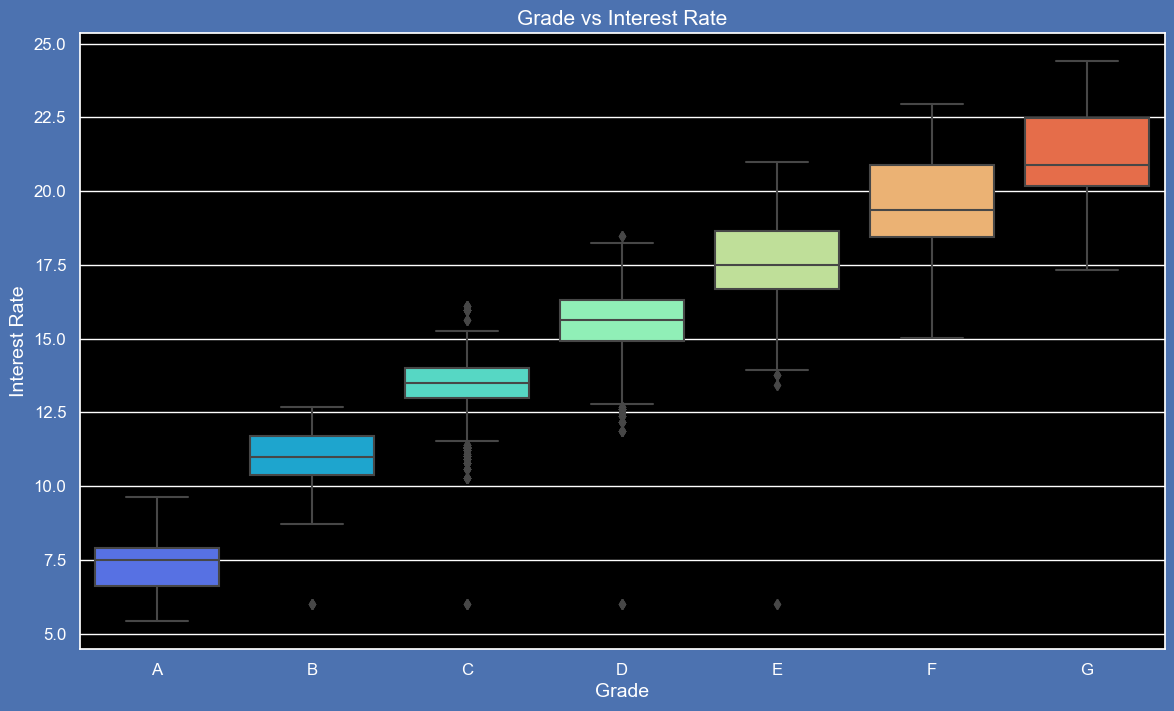

In [122]:
# Bivariate Analysis - Grade vs Interest Rate

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(y='int_rate', x='grade', data =loanDf,palette='rainbow',order = 'ABCDEFG')
  ax.set_title('Grade vs Interest Rate',fontsize=15,color='w')
  ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_xlabel('Grade',fontsize=14,color = 'w')
  plt.show()

In [123]:
# Observations -
#A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
#It is clear that intrest rate is increasing with grades moving from A to F.

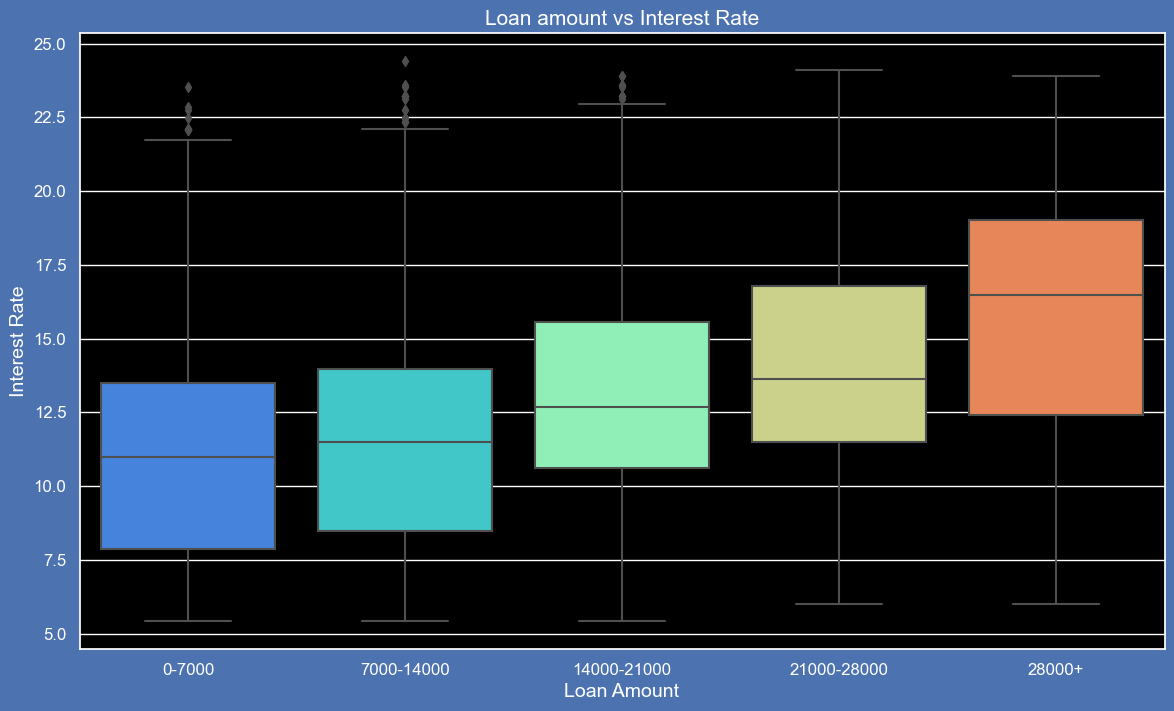

In [124]:
# Bivariate Analysis - Loan Amount vs Interest Rate

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(y='int_rate', x='loan_amnt_categories', data =loanDf,palette='rainbow')
  ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
  ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
  plt.show()

In [125]:
# Observations -
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

In [126]:
# Segmented Analysis
# The purpose of loan also plays a major driving factor, that will be analyzed below
# filtering the fully paid & charged-off converting it to integer type

loanDf["purpose"].describe

<bound method NDFrame.describe of 0               credit_card
1                       car
2            small_business
3                     other
5                   wedding
6        debt_consolidation
7                       car
8            small_business
9                     other
10       debt_consolidation
11       debt_consolidation
12       debt_consolidation
13              credit_card
14                    other
15       debt_consolidation
16         home_improvement
17           major_purchase
18                  medical
19       debt_consolidation
20       debt_consolidation
21       debt_consolidation
22              credit_card
23       debt_consolidation
24           major_purchase
25              credit_card
26       debt_consolidation
27                    other
28       debt_consolidation
29              credit_card
30       debt_consolidation
31       debt_consolidation
33       debt_consolidation
34              credit_card
35              credit_card
36            

In [128]:
# filtering the fully paid & charged-off converting it to integer type
loanDf['loan_status'] = loanDf['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loanDf['loan_status'] = loanDf['loan_status'].apply(lambda x: pd.to_numeric(x))

In [129]:
loanDf["loan_status"].describe

<bound method NDFrame.describe of 0        1
1        1
2        1
3        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
33       1
34       1
35       1
36       1
37       1
38       1
40       1
41       1
42       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
50       1
51       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       1
65       1
66       1
67       1
68       1
69       1
70       1
71       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
87       1
88       1
89       1
90       1
91       

In [134]:
# Custom Function to plot a bar graph for the segmented analysis

def segmented_analysis_for_loan_status_bar_plot(x_variable):
  plt.figure(figsize=(16, 6))
  plt.xticks(rotation=90)

  title = str(x_variable) + ' vs Loan Status'
  plt.title(title)
  sns.barplot(x=str(x_variable), y='loan_status', data=loanDf, palette = "husl")
  plt.show()

In [135]:
# Custom Function to plot a countplot for the segmented analysis
def segmented_analysis_count_plot(x_variable):
  plt.figure(figsize=(16, 6))
  plt.xticks(rotation=90)
  
  title = "countplot for " + x_variable
  plt.title(title)
  sns.countplot(x=str(x_variable), data=loanDf, palette = "flare")
  plt.show()

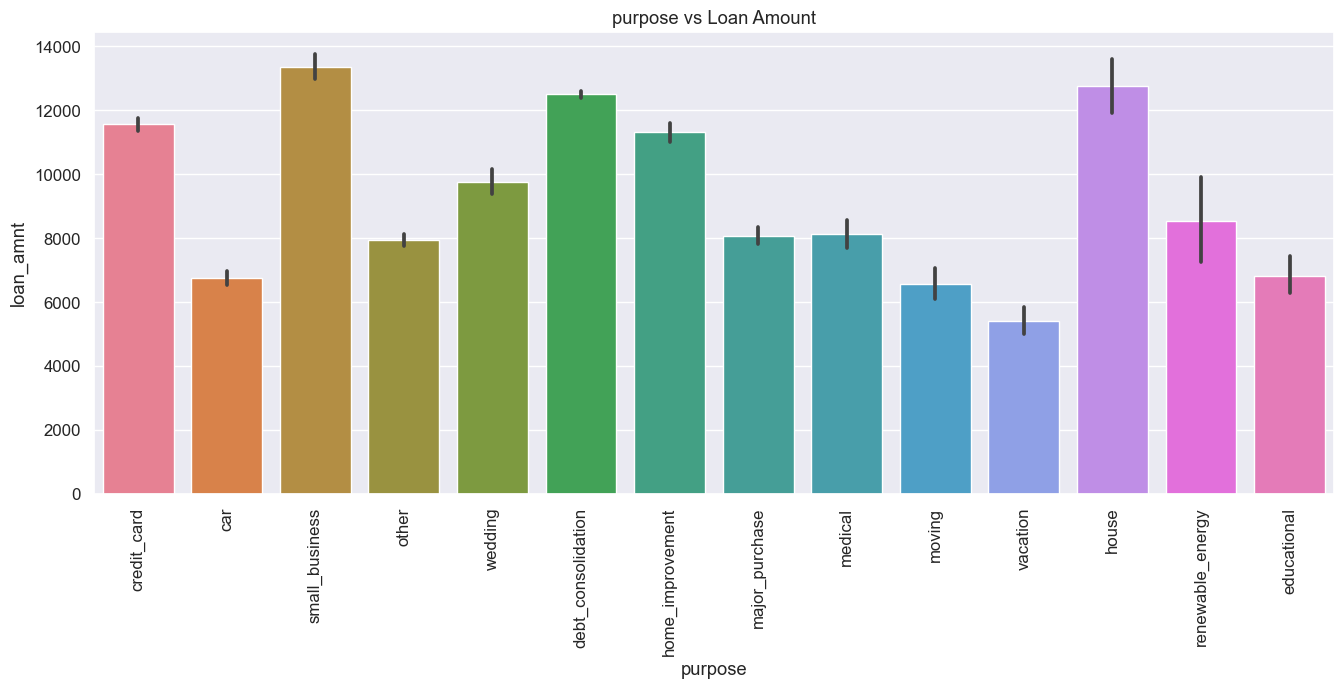

In [137]:
# Purpose of Loan
segmented_analysis_for_loan_status_bar_plot("purpose")

In [138]:
# Observations -
# small business has the most loans defualts, followed by renewable energy and education.

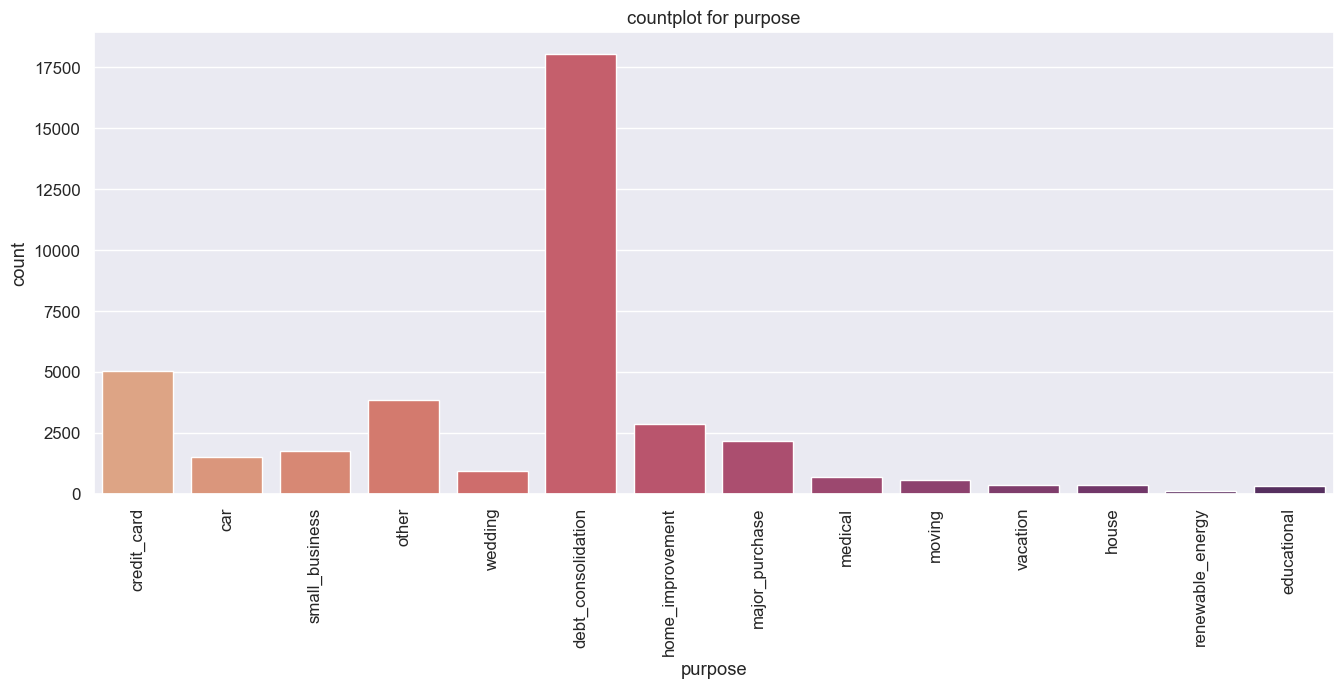

In [139]:
# Number of loans for each purpose
segmented_analysis_count_plot("purpose")


In [ ]:
# # Observations -
#small business has the most loans defualts, followed by renewable energy and education but the count plot 
#depicts that there is more samples of debt_consolidation. 
#The small business has more sample compared to eductation followed by renewable energy

In [140]:
# Now we analyze the major 5 purposes of loan according to the countplot above

# filtering the df for the 5 types of loans mentioned above
main_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
loanDf = loanDf[loanDf['purpose'].isin(main_purposes)]
loanDf['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
small_business         1754
Name: purpose, dtype: int64

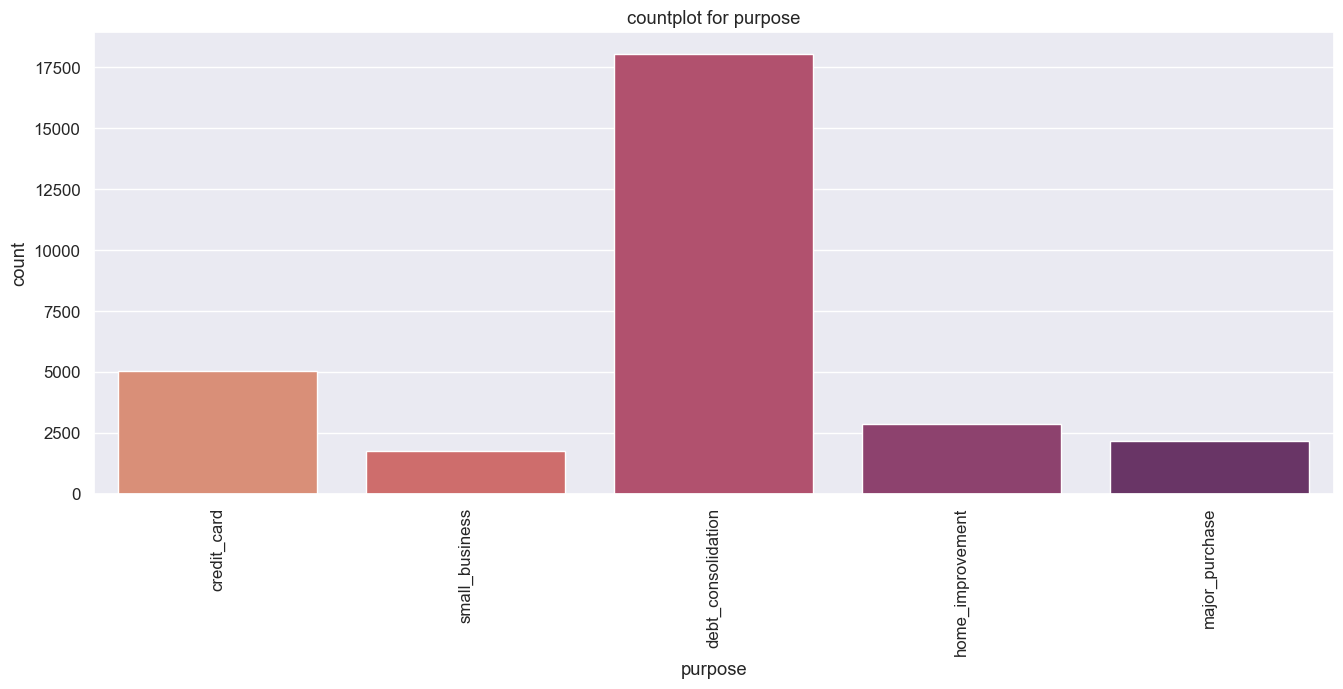

In [141]:
segmented_analysis_count_plot("purpose")